# KNN 
The idea is to predicting unknown values by matching them with the most similar known values.

Refs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
#importing 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#Loading data 
df = pd.read_csv('Classified Data',index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## Standarize the features values 
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. So we want to standarize the variable values on the same scale.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
#instantiate 
scaler = StandardScaler() 

In [5]:
#fit the scaler 
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
#Transform the data 
scaled_data = scaler.transform(df.drop('TARGET CLASS',axis=1)) 
scaled_data

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
#Create the dataframe using the scaled data 
df_scaled = pd.DataFrame(data=scaled_data,columns=df.columns[:-1]) #All but the last column 
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


## Using KNN model 

In [8]:
#split data 
from sklearn.model_selection import train_test_split
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# train the KNN model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #Take k=1 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
#Model predictions 
pred = knn.predict(X_test)

In [11]:
#model evaluation 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

[[146   9]
 [ 11 164]]


94% accuracy with k=1 is already good 

### Trying an optimal k value 

In [12]:
#computing error rate 
error_rate = [] 

for i in range(1,45):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    #print(error_rate)

In [13]:
error_rate

[0.06060606060606061,
 0.08181818181818182,
 0.05454545454545454,
 0.05757575757575758,
 0.048484848484848485,
 0.05454545454545454,
 0.05757575757575758,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514,
 0.05454545454545454,
 0.048484848484848485,
 0.05454545454545454,
 0.051515151515151514,
 0.05454545454545454,
 0.05757575757575758,
 0.06060606060606061,
 0.05454545454545454,
 0.05757575757575758,
 0.05454545454545454,
 0.051515151515151514,
 0.051515151515151514,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485]

<AxesSubplot:>

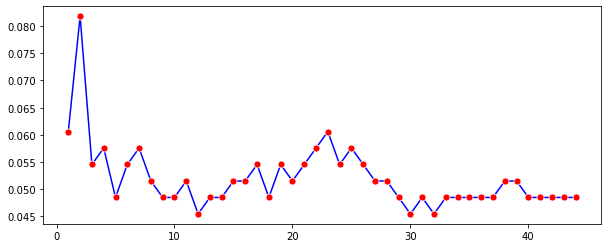

In [14]:
#Plot the error rate 
plt.figure(figsize=(10,4))
sns.lineplot(x=range(1,45),y=error_rate,color ='b', marker='o', markerfacecolor='r',markersize=7)

In [15]:
#Taking k=12 

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred_k12 = knn.predict(X_test)
print(confusion_matrix(y_test,pred_k12))
print(classification_report(y_test,pred_k12))

[[149   6]
 [  9 166]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



Somewhat improve the performance with increasing k value  

**Refs:** 

* Python Machine Learning by Wei-Meng Lee
* https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f
* https://www.geeksforgeeks.org/k-nearest-neighbours/#    
* Pierian data